NYC Proprety Sales

1- Framing the problem

The idea here is to predrict the selling price of appartments in New York City

2- Data Acquisition 

Importing the data

In [1]:
import sys

#assert sys.version_info >= (3, 7)
#from packaging import version

import sklearn

#assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
#unable to make it work
#!pip install --upgrade scikit-learn
#pip show scikit-learn
#!pip install --upgrade packaging

In [2]:
import pandas as pd
df=pd.read_csv("nyc-rolling-sales.csv")
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


3 -Data Exploration

In [3]:
df.shape[0]

84548

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

As a first impression we can see that there's no missing values. But it was mentionned in the dataset description that when the price is 0$ or -, it means the appartments have not been sold but they are transfers of deeds between parties (parents to children etc..). We are going to remove those observations as they are not relevant to our study. 
It is to be noted that the rows with value '-' were not flagged as Nan. 

In [5]:
#removing rows where Sale Price is 0, newdf is also used to keep an original
#version of the dataset with df

# Convert the Value column to a numeric type
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Select only the rows that have numerical values in the Value column
newdf = df[df['SALE PRICE'].notnull()]
newdf=newdf.drop(newdf.loc[newdf['SALE PRICE']==0].index)

newdf.head(10)



,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07 00:00:00
11,15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,,D1,530-532 EAST 5TH STREET,...,10,0,10,3717,12350,2009,2,D1,10350000.0,2016-10-17 00:00:00
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,1.0,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,-,-,1920,2,C6,499000.0,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,-,-,1920,2,C6,10.0,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,-,-,1920,2,C6,529500.0,2017-06-09 00:00:00


Unnamed column was the one used as index in the dataset, this column can be reomved when preparing the data for the machien learning model

Let's look at the data

In [6]:
newdf['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              2200
UPPER EAST SIDE (59-79)     1462
UPPER EAST SIDE (79-96)     1318
UPPER WEST SIDE (59-79)     1092
MIDTOWN EAST                1069
                            ... 
VAN CORTLANDT PARK             2
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
PELHAM BAY                     1
BRONX PARK                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

Lots of Neighborhood, might not be ideal for a regression after

In [7]:
newdf['TAX CLASS AT TIME OF SALE'].value_counts()

2    29694
1    27421
4     2644
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [8]:
newdf['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         13007
10 COOPS - ELEVATOR APARTMENTS                  11541
13 CONDOS - ELEVATOR APARTMENTS                 10411
02 TWO FAMILY DWELLINGS                         10156
09 COOPS - WALKUP APARTMENTS                     2512
03 THREE FAMILY DWELLINGS                        2415
07 RENTALS - WALKUP APARTMENTS                   1804
04 TAX CLASS 1 CONDOS                            1275
17 CONDO COOPS                                   1112
15 CONDOS - 2-10 UNIT RESIDENTIAL                1042
12 CONDOS - WALKUP APARTMENTS                     668
05 TAX CLASS 1 VACANT LAND                        518
22 STORE BUILDINGS                                492
14 RENTALS - 4-10 UNIT                            337
44 CONDO PARKING                                  287
29 COMMERCIAL GARAGES                             284
43 CONDO OFFICE BUILDINGS                         247
21 OFFICE BUILDINGS                               227
08 RENTALS - ELEVATOR APARTM

In [9]:
newdf['BOROUGH'].value_counts()

4    18441
3    15690
1    14439
5     6011
2     5178
Name: BOROUGH, dtype: int64

In the dataset description, Borough is said to be a digit code. 1 is for Manhattan, 2 is for Bronx, 3 is for Brooklyn, 4 is for Queens and 5 is for Staten Island. 

In [10]:
newdf.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04
mean,10300.064877,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,1810.107599,1.629629,1.494927e+06
std,7088.112601,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,505.745865,0.706166,1.232953e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00
25%,4249.000000,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,3.700000e+05
50%,9032.000000,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,6.255000e+05
75%,15777.000000,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,1966.000000,2.000000,1.070000e+06
max,26738.000000,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


The 2 columns about square feet, do not appear in the describe. If we take look closer we can see that there are some rows with the value "-". The columns are then not seen as numerical column, we'll correct that in the data cleaning part

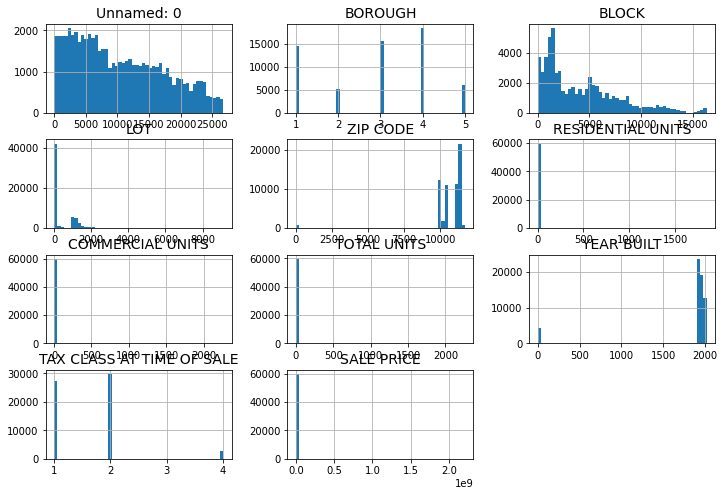

In [11]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

newdf.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(newdf, 0.2)
len(train_set)

47808

In [14]:
len(test_set)

11951

In [15]:
np.random.seed(42)

In [16]:
import numpy as np
newdf["Sale_cat"] = pd.cut(newdf["SALE PRICE"],
                               bins=[0, 100000, 250000, 500000, 750000, 1000000.,np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

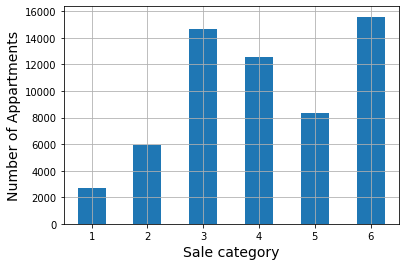

In [17]:
newdf["Sale_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Sale category")
plt.ylabel("Number of Appartments")
plt.show()

We can note that there an important number of appartment sold under 100k$, this is not realy credible for New York City. We might need to remove the outliers later on. 

In [18]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(newdf, newdf["Sale_cat"]):
    strat_train_set_n = newdf.iloc[train_index]
    strat_test_set_n = newdf.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])




In [19]:
strat_train_set, strat_test_set = strat_splits[0]


In [20]:
strat_train_set, strat_test_set = train_test_split(
    newdf, test_size=0.2, stratify=newdf["Sale_cat"], random_state=42)

In [21]:
strat_test_set["Sale_cat"].value_counts() / len(strat_test_set)

6    0.260961
3    0.245566
4    0.209505
5    0.139224
2    0.098979
1    0.045766
Name: Sale_cat, dtype: float64

Looking for correlation

In [22]:
attributes=newdf[['BOROUGH','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS',
                  'COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET',
           'GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE' ,'SALE PRICE']]
corr_matrix = attributes.corr()
print(corr_matrix)

                            BOROUGH     BLOCK       LOT  ZIP CODE  \
BOROUGH                    1.000000  0.442712 -0.266421  0.285929   
BLOCK                      0.442712  1.000000 -0.238997  0.257812   
LOT                       -0.266421 -0.238997  1.000000 -0.153238   
ZIP CODE                   0.285929  0.257812 -0.153238  1.000000   
RESIDENTIAL UNITS         -0.016944 -0.008772 -0.030872  0.006352   
COMMERCIAL UNITS           0.001154  0.001652 -0.008577  0.002657   
TOTAL UNITS               -0.013389 -0.006548 -0.029105  0.006755   
TAX CLASS AT TIME OF SALE -0.364660 -0.329280  0.268008 -0.141925   
SALE PRICE                -0.076723 -0.062132  0.009996 -0.033567   

                           RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
BOROUGH                            -0.016944          0.001154    -0.013389   
BLOCK                              -0.008772          0.001652    -0.006548   
LOT                                -0.030872         -0.008577    -0.029

In [23]:
corr_matrix["SALE PRICE"].sort_values(ascending=False)

SALE PRICE                   1.000000
TOTAL UNITS                  0.136367
RESIDENTIAL UNITS            0.134716
TAX CLASS AT TIME OF SALE    0.110197
COMMERCIAL UNITS             0.046416
LOT                          0.009996
ZIP CODE                    -0.033567
BLOCK                       -0.062132
BOROUGH                     -0.076723
Name: SALE PRICE, dtype: float64

In [24]:
#from pandas.plotting import scatter_matrix

#attributes = ['BOROUGH','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS',
                  #'COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET',
           #'GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE' ,'SALE PRICE']
#scatter_matrix(newdf[attributes], figsize=(20, 20))
#plt.show()

Can't realy see anything on the plots, hence the matrix above

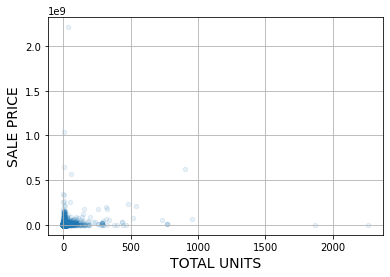

In [25]:
newdf.plot(kind="scatter", x="TOTAL UNITS", y="SALE PRICE",
             alpha=0.1, grid=True)
plt.show()

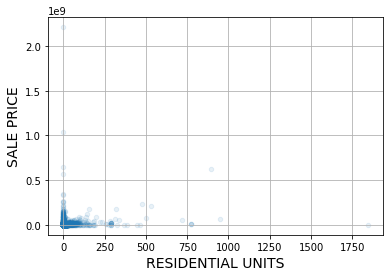

In [26]:
newdf.plot(kind="scatter", x="RESIDENTIAL UNITS", y="SALE PRICE",
             alpha=0.1, grid=True)
plt.show()

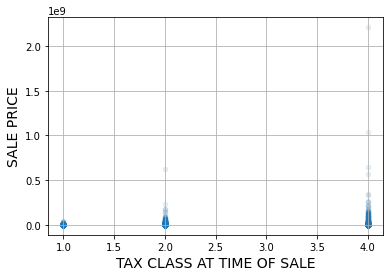

In [27]:
newdf.plot(kind="scatter", x="TAX CLASS AT TIME OF SALE", y="SALE PRICE",
             alpha=0.1, grid=True)
plt.show()

Let's revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, unless you pass inplace=True):

4-Data Preparation 

Unamed column in the index used in the original dataset, this column is not usefull for our study. 
The rows were the Square feet dimension is missing also mostly have 0 in the column of Residential unit, Commercial Units and Total Units. Those predictors are important to the Sale Price. I decide to remove the rows with the missing values. 


In [28]:
count = newdf['LAND SQUARE FEET'].str.count('-').sum()
print(count)

21188


In [29]:
count=newdf['GROSS SQUARE FEET'].str.count('-').sum()
print(count)

21739


In [30]:
#Removing '-' for Land Square Feet
# Convert the Value column to a numeric type

newdf['LAND SQUARE FEET'] = pd.to_numeric(newdf['LAND SQUARE FEET'], errors='coerce')
newdf['GROSS SQUARE FEET'] = pd.to_numeric(newdf['GROSS SQUARE FEET'], errors='coerce')


# Select only the rows that have numerical values in the Value column
newdf2 = newdf[newdf['LAND SQUARE FEET'].notnull()]
newdf2=newdf2.drop(newdf2.loc[newdf['LAND SQUARE FEET']==0].index)

newdf2.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_cat
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,6
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,6
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,6
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,6
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,6
11,15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,,D1,530-532 EAST 5TH STREET,...,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17 00:00:00,6
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,,C6,244 EAST 7TH STREET,...,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21 00:00:00,6
75,79,1,ALPHABET CITY,11A CONDO-RENTALS,2,397,1301,,RR,250 EAST HOUSTON STREET,...,0,132,33650.0,NaN,1989,2,RR,52625000.0,2016-10-19 00:00:00,6
172,176,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,...,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15 00:00:00,6
173,177,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,,S4,165 AVENUE B,...,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30 00:00:00,6


In [31]:
# Select only the rows that have numerical values in the Value column
newdf2 = newdf[newdf['GROSS SQUARE FEET'].notnull()]
newdf2=newdf2.drop(newdf2.loc[newdf['GROSS SQUARE FEET']==0].index)

newdf2.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_cat
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,6
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,6
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,6
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,6
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,6
11,15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,,D1,530-532 EAST 5TH STREET,...,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17 00:00:00,6
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,,C6,244 EAST 7TH STREET,...,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21 00:00:00,6
73,77,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,,RR,254 EAST 2ND STREET,...,0,47,NaN,36472.0,2005,2,RR,28000000.0,2016-10-13 00:00:00,6
172,176,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,...,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15 00:00:00,6
173,177,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,,S4,165 AVENUE B,...,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30 00:00:00,6


In [32]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29334 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      29334 non-null  int64   
 1   BOROUGH                         29334 non-null  int64   
 2   NEIGHBORHOOD                    29334 non-null  object  
 3   BUILDING CLASS CATEGORY         29334 non-null  object  
 4   TAX CLASS AT PRESENT            29334 non-null  object  
 5   BLOCK                           29334 non-null  int64   
 6   LOT                             29334 non-null  int64   
 7   EASE-MENT                       29334 non-null  object  
 8   BUILDING CLASS AT PRESENT       29334 non-null  object  
 9   ADDRESS                         29334 non-null  object  
 10  APARTMENT NUMBER                29334 non-null  object  
 11  ZIP CODE                        29334 non-null  int64   
 12  RESIDENTIAL UNITS 

In [33]:
print(newdf2.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Sale_cat'],
      dtype='object')


Following code would show that with this data cleaning we can now see that the gross square feet is an important predictor for the sale price.

attributes=newdf2[['BOROUGH','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS',
                  'COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET',
           'GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE' ,'SALE PRICE']]
corr_matrix = attributes.corr()
print(corr_matrix)

corr_matrix["SALE PRICE"].sort_values(ascending=False)

newdf2.plot(kind="scatter", x="GROSS SQUARE FEET", y="SALE PRICE",
             alpha=0.1, grid=True)
plt.show()

In [34]:
#other way to deal with missing values
null_rows_idx =newdf2.isnull().any(axis=1)
newdf2.loc[null_rows_idx].head()

newdf_option2 = newdf2.copy()

newdf_option2.dropna(subset=['GROSS SQUARE FEET','LAND SQUARE FEET'], inplace=True)  # option 1

newdf_option2.loc[null_rows_idx].head()

newdf_option2.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_cat
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,6
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,6
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,6
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,6
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,6


In [35]:
#OPtion 2
newdf_option3 = newdf2.copy()

newdf_option3.drop(["LAND SQUARE FEET","GROSS SQUARE FEET"], axis=1, inplace=True)  # option 2

newdf_option3.loc[null_rows_idx].head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_cat
73,77,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,,RR,254 EAST 2ND STREET,...,10009,47,0,47,2005,2,RR,28000000.0,2016-10-13 00:00:00,6
1874,1878,1,EAST VILLAGE,11A CONDO-RENTALS,2,466,1103,,RR,55 3 AVENUE,...,10003,55,0,55,1986,2,RR,57000000.0,2017-06-20 00:00:00,6
2553,2557,1,FINANCIAL,17 CONDO COOPS,2,7,1002,,R9,1 COENTIES SLIP,...,10004,42,0,42,0,2,R9,26750000.0,2017-07-20 00:00:00,6
10185,10189,1,MURRAY HILL,11A CONDO-RENTALS,2,859,1401,,RR,110 MADISON AVENUE,...,10016,18,0,18,2013,2,RR,3584743.0,2016-09-22 00:00:00,6


In [36]:
#option 3
newdf_option4 = newdf2.copy()

median = newdf2['GROSS SQUARE FEET'].median()
newdf_option4["GROSS SQUARE FEET"].fillna(median, inplace=True)  # option 3

median2= newdf2['LAND SQUARE FEET'].median()
newdf_option4['LAND SQUARE FEET'].fillna(median2, inplace=True)

newdf_option4.loc[null_rows_idx].head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_cat
73,77,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,,RR,254 EAST 2ND STREET,...,0,47,2500.0,36472.0,2005,2,RR,28000000.0,2016-10-13 00:00:00,6
1874,1878,1,EAST VILLAGE,11A CONDO-RENTALS,2,466,1103,,RR,55 3 AVENUE,...,0,55,2500.0,51644.0,1986,2,RR,57000000.0,2017-06-20 00:00:00,6
2553,2557,1,FINANCIAL,17 CONDO COOPS,2,7,1002,,R9,1 COENTIES SLIP,...,0,42,2500.0,32843.0,0,2,R9,26750000.0,2017-07-20 00:00:00,6
10185,10189,1,MURRAY HILL,11A CONDO-RENTALS,2,859,1401,,RR,110 MADISON AVENUE,...,0,18,2500.0,28801.0,2013,2,RR,3584743.0,2016-09-22 00:00:00,6


In [37]:
print(newdf2.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Sale_cat'],
      dtype='object')


In [38]:
newdf2.dropna()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_cat
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,6
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,6
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,6
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,6
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00,3
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00,4
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00,3
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00,6


In [39]:
newdf2_labels = newdf2["SALE PRICE"].copy()

In [41]:
newdf2 = newdf2.drop(["SALE PRICE","Sale_cat","Unnamed: 0","EASE-MENT","ADDRESS","APARTMENT NUMBER"], axis=1)

In [42]:
print(newdf2.columns)

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE DATE'],
      dtype='object')


In [43]:
print(newdf2_labels)

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 29334, dtype: float64


Let's follow on the median method


In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [45]:
newdf2_num = newdf2.select_dtypes(include=[np.number])
imputer.fit(newdf2_num)
imputer.statistics_

array([4.0000e+00, 4.9030e+03, 3.8000e+01, 1.1221e+04, 2.0000e+00,
       0.0000e+00, 2.0000e+00, 2.5000e+03, 1.8740e+03, 1.9300e+03,
       1.0000e+00])

Check that this is the same as manually computing the median of each attribute:

In [46]:
newdf2_num.median().values

array([4.0000e+00, 4.9030e+03, 3.8000e+01, 1.1221e+04, 2.0000e+00,
       0.0000e+00, 2.0000e+00, 2.5000e+03, 1.8740e+03, 1.9300e+03,
       1.0000e+00])

Transform the training Set

In [47]:
X = imputer.transform(newdf2_num)
imputer.feature_names_in_

array(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE'],
      dtype=object)

In [48]:
newdf2_tr = pd.DataFrame(X, columns=newdf2_num.columns,
                          index=newdf2_num.index)

In [49]:
newdf2_tr.loc[null_rows_idx].head(5)

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE
73,1.0,385.0,1102.0,10009.0,47.0,0.0,47.0,2500.0,36472.0,2005.0,2.0
1874,1.0,466.0,1103.0,10003.0,55.0,0.0,55.0,2500.0,51644.0,1986.0,2.0
2553,1.0,7.0,1002.0,10004.0,42.0,0.0,42.0,2500.0,32843.0,0.0,2.0
10185,1.0,859.0,1401.0,10016.0,18.0,0.0,18.0,2500.0,28801.0,2013.0,2.0


In [50]:
imputer.strategy

'median'

In [51]:
newdf2_tr = pd.DataFrame(X, columns=newdf2_num.columns,
                          index=newdf2_num.index)

In [52]:
newdf2_tr.loc[null_rows_idx].head(5)  # not shown in the book

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE
73,1.0,385.0,1102.0,10009.0,47.0,0.0,47.0,2500.0,36472.0,2005.0,2.0
1874,1.0,466.0,1103.0,10003.0,55.0,0.0,55.0,2500.0,51644.0,1986.0,2.0
2553,1.0,7.0,1002.0,10004.0,42.0,0.0,42.0,2500.0,32843.0,0.0,2.0
10185,1.0,859.0,1401.0,10016.0,18.0,0.0,18.0,2500.0,28801.0,2013.0,2.0


Let's work on the outliers

In [53]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [54]:
outlier_pred

array([-1, -1, -1, ...,  1, -1, -1])

Dropping the outliers

In [55]:
#newdf3 = newdf2.iloc[outlier_pred == 1]
#newdf3_labels = newdf2_labels.iloc[outlier_pred == 1]

Handling Categorical Attribute

In [57]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
newdf2_cat_encoded = ordinal_encoder.fit_transform(newdf2_cat)

In [56]:
newdf2_cat=newdf2[["NEIGHBORHOOD"]]
newdf2_cat.head(20)

,NEIGHBORHOOD
0,ALPHABET CITY
3,ALPHABET CITY
4,ALPHABET CITY
6,ALPHABET CITY
9,ALPHABET CITY
11,ALPHABET CITY
22,ALPHABET CITY
73,ALPHABET CITY
172,ALPHABET CITY
173,ALPHABET CITY


In [58]:
newdf2_cat_encoded[:20]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.]])

In [59]:
ordinal_encoder.categories_

[array(['AIRPORT LA GUARDIA', 'ALPHABET CITY', 'ANNADALE', 'ARDEN HEIGHTS',
        'ARROCHAR', 'ARROCHAR-SHORE ACRES', 'ARVERNE', 'ASTORIA',
        'BATH BEACH', 'BATHGATE', 'BAY RIDGE', 'BAYCHESTER', 'BAYSIDE',
        'BEDFORD PARK/NORWOOD', 'BEDFORD STUYVESANT', 'BEECHHURST',
        'BELLE HARBOR', 'BELLEROSE', 'BELMONT', 'BENSONHURST',
        'BERGEN BEACH', 'BOERUM HILL', 'BOROUGH PARK', 'BRIARWOOD',
        'BRIGHTON BEACH', 'BROAD CHANNEL', 'BRONX PARK', 'BRONXDALE',
        'BROOKLYN HEIGHTS', 'BROWNSVILLE', 'BULLS HEAD', 'BUSH TERMINAL',
        'BUSHWICK', 'CAMBRIA HEIGHTS', 'CANARSIE', 'CARROLL GARDENS',
        'CASTLE HILL/UNIONPORT', 'CASTLETON CORNERS', 'CHELSEA',
        'CHINATOWN', 'CITY ISLAND', 'CITY ISLAND-PELHAM STRIP',
        'CIVIC CENTER', 'CLINTON', 'CLINTON HILL', 'CLOVE LAKES',
        'CO-OP CITY', 'COBBLE HILL', 'COBBLE HILL-WEST', 'COLLEGE POINT',
        'CONCORD', 'CONCORD-FOX HILLS', 'CONEY ISLAND', 'CORONA',
        'COUNTRY CLUB', 'CROTONA PARK'

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
newdf2_cat_1hot = cat_encoder.fit_transform(newdf2_cat)

In [61]:
newdf2_cat_1hot 

<29334x250 sparse matrix of type '<class 'numpy.float64'>'
	with 29334 stored elements in Compressed Sparse Row format>

In [62]:
newdf2_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [63]:
cat_encoder = OneHotEncoder(sparse_output=False)
newdf2_cat_1hot = cat_encoder.fit_transform(newdf2_cat)
newdf2_cat_1hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [64]:
cat_encoder.categories_

[array(['AIRPORT LA GUARDIA', 'ALPHABET CITY', 'ANNADALE', 'ARDEN HEIGHTS',
        'ARROCHAR', 'ARROCHAR-SHORE ACRES', 'ARVERNE', 'ASTORIA',
        'BATH BEACH', 'BATHGATE', 'BAY RIDGE', 'BAYCHESTER', 'BAYSIDE',
        'BEDFORD PARK/NORWOOD', 'BEDFORD STUYVESANT', 'BEECHHURST',
        'BELLE HARBOR', 'BELLEROSE', 'BELMONT', 'BENSONHURST',
        'BERGEN BEACH', 'BOERUM HILL', 'BOROUGH PARK', 'BRIARWOOD',
        'BRIGHTON BEACH', 'BROAD CHANNEL', 'BRONX PARK', 'BRONXDALE',
        'BROOKLYN HEIGHTS', 'BROWNSVILLE', 'BULLS HEAD', 'BUSH TERMINAL',
        'BUSHWICK', 'CAMBRIA HEIGHTS', 'CANARSIE', 'CARROLL GARDENS',
        'CASTLE HILL/UNIONPORT', 'CASTLETON CORNERS', 'CHELSEA',
        'CHINATOWN', 'CITY ISLAND', 'CITY ISLAND-PELHAM STRIP',
        'CIVIC CENTER', 'CLINTON', 'CLINTON HILL', 'CLOVE LAKES',
        'CO-OP CITY', 'COBBLE HILL', 'COBBLE HILL-WEST', 'COLLEGE POINT',
        'CONCORD', 'CONCORD-FOX HILLS', 'CONEY ISLAND', 'CORONA',
        'COUNTRY CLUB', 'CROTONA PARK'

In [65]:
df_test = pd.DataFrame({"NEIGHBORHOOD": ["QUEENS VILLAGE", "SOHO"]})
pd.get_dummies(df_test)

,NEIGHBORHOOD_QUEENS VILLAGE,NEIGHBORHOOD_SOHO
0,1,0
1,0,1


In [66]:
cat_encoder.transform(df_test)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [67]:
df_test_unknown = pd.DataFrame({"NEIGHBORHOOD": ["ALPHABET CITY", "PRINCES BAY"]})
pd.get_dummies(df_test_unknown)

,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_PRINCES BAY
0,1,0
1,0,1


In [68]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [69]:
cat_encoder.feature_names_in_

array(['NEIGHBORHOOD'], dtype=object)

In [70]:
cat_encoder.get_feature_names_out()

array(['NEIGHBORHOOD_AIRPORT LA GUARDIA', 'NEIGHBORHOOD_ALPHABET CITY',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_ARDEN HEIGHTS',
       'NEIGHBORHOOD_ARROCHAR', 'NEIGHBORHOOD_ARROCHAR-SHORE ACRES',
       'NEIGHBORHOOD_ARVERNE', 'NEIGHBORHOOD_ASTORIA',
       'NEIGHBORHOOD_BATH BEACH', 'NEIGHBORHOOD_BATHGATE',
       'NEIGHBORHOOD_BAY RIDGE', 'NEIGHBORHOOD_BAYCHESTER',
       'NEIGHBORHOOD_BAYSIDE', 'NEIGHBORHOOD_BEDFORD PARK/NORWOOD',
       'NEIGHBORHOOD_BEDFORD STUYVESANT', 'NEIGHBORHOOD_BEECHHURST',
       'NEIGHBORHOOD_BELLE HARBOR', 'NEIGHBORHOOD_BELLEROSE',
       'NEIGHBORHOOD_BELMONT', 'NEIGHBORHOOD_BENSONHURST',
       'NEIGHBORHOOD_BERGEN BEACH', 'NEIGHBORHOOD_BOERUM HILL',
       'NEIGHBORHOOD_BOROUGH PARK', 'NEIGHBORHOOD_BRIARWOOD',
       'NEIGHBORHOOD_BRIGHTON BEACH', 'NEIGHBORHOOD_BROAD CHANNEL',
       'NEIGHBORHOOD_BRONX PARK', 'NEIGHBORHOOD_BRONXDALE',
       'NEIGHBORHOOD_BROOKLYN HEIGHTS', 'NEIGHBORHOOD_BROWNSVILLE',
       'NEIGHBORHOOD_BULLS HEAD', 'NEIGHBOR

In [71]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [72]:
df_output

,NEIGHBORHOOD_AIRPORT LA GUARDIA,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_ARDEN HEIGHTS,NEIGHBORHOOD_ARROCHAR,NEIGHBORHOOD_ARROCHAR-SHORE ACRES,NEIGHBORHOOD_ARVERNE,NEIGHBORHOOD_ASTORIA,NEIGHBORHOOD_BATH BEACH,NEIGHBORHOOD_BATHGATE,...,NEIGHBORHOOD_WILLIAMSBURG-EAST,NEIGHBORHOOD_WILLIAMSBURG-NORTH,NEIGHBORHOOD_WILLIAMSBURG-SOUTH,NEIGHBORHOOD_WILLOWBROOK,NEIGHBORHOOD_WINDSOR TERRACE,NEIGHBORHOOD_WOODHAVEN,NEIGHBORHOOD_WOODLAWN,NEIGHBORHOOD_WOODROW,NEIGHBORHOOD_WOODSIDE,NEIGHBORHOOD_WYCKOFF HEIGHTS
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


FEATURE SCALING

In [73]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
newdf2_num_min_max_scaled = min_max_scaler.fit_transform(newdf2_num)

In [74]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
newdf2_num_std_scaled = std_scaler.fit_transform(newdf2_num)

In [75]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(newdf2_labels.to_frame())

model = LinearRegression()
model.fit(newdf2[["GROSS SQUARE FEET"]], scaled_labels)
some_new_data = newdf2[["GROSS SQUARE FEET"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [76]:
predictions

array([[2099819.34755016],
       [2189341.48444329],
       [1638299.85650507],
       [1539926.66087957],
       [5155457.70935718]])

In [77]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(newdf2[["GROSS SQUARE FEET"]], newdf2_labels)
predictions = model.predict(some_new_data)

In [78]:
predictions

array([2099819.34755016, 2189341.48444329, 1638299.85650507,
       1539926.66087957, 5155457.70935718])

Custom Transformers

In [79]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(newdf2[["TOTAL UNITS"]])
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(newdf2[["GROSS SQUARE FEET"]])
age_simil_35

C:\Users\33652\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [80]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

Transformation Pipelines

In [81]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [82]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [83]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [84]:
newdf2_num_prepared = num_pipeline.fit_transform(newdf2_num)
newdf2_num_prepared[:2].round(2)

array([[-2.48, -1.36, -0.44, -1.89,  0.1 , -0.02,  0.07, -0.07,  0.05,
        -0.83,  1.11],
       [-2.48, -1.36, -0.32, -1.89,  0.35, -0.02,  0.27, -0.05,  0.06,
        -0.56,  1.11]])

In [85]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [86]:
df_newdf2_num_prepared = pd.DataFrame(
   newdf2_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=newdf2_num.index)

In [87]:
df_newdf2_num_prepared.head(2)  # extra code

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE
0,-2.484968,-1.364466,-0.444137,-1.886846,0.096871,-0.023498,0.065604,-0.068020,0.052881,-0.825916,1.108181
3,-2.484968,-1.361820,-0.324402,-1.886846,0.346416,-0.023498,0.268961,-0.051892,0.063240,-0.557404,1.108181


In [88]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [89]:
num_pipeline[1]

StandardScaler()

In [90]:
num_pipeline[1]

StandardScaler()

In [91]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [92]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [93]:
from sklearn.compose import ColumnTransformer

num_attribs = ["BOROUGH", "BLOCK", "LOT", "ZIPCODE",
               "RESIDENTIAL UNITS", "COMMERCIAL UNITS", 
               "TOTAL UNITS", "GROSS SQUARE FEET","LAND SQUARE FEET",
              "TAX CLASS AT SALE"]
cat_attribs = ["NEIGHBORHOOD"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [94]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [95]:
newdf2_prepared = preprocessing.fit_transform(newdf2)

In [96]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("Residential", ratio_pipeline(), ["RESIDENTIAL UNITS", "TOTAL UNITS"]),
        ("Commercial", ratio_pipeline(), ["COMMERCIAL UNITS", "TOTAL UNITS"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

NameError: name 'ClusterSimilarity' is not defined

In [97]:
newdf2_prepared = preprocessing.fit_transform(newdf2)
newdf2_prepared.shape

(29334, 891)

In [98]:
preprocessing.get_feature_names_out()

array(['pipeline-1__BOROUGH', 'pipeline-1__BLOCK', 'pipeline-1__LOT',
       'pipeline-1__ZIP CODE', 'pipeline-1__RESIDENTIAL UNITS',
       'pipeline-1__COMMERCIAL UNITS', 'pipeline-1__TOTAL UNITS',
       'pipeline-1__LAND SQUARE FEET', 'pipeline-1__GROSS SQUARE FEET',
       'pipeline-1__YEAR BUILT', 'pipeline-1__TAX CLASS AT TIME OF SALE',
       'pipeline-2__NEIGHBORHOOD_AIRPORT LA GUARDIA',
       'pipeline-2__NEIGHBORHOOD_ALPHABET CITY',
       'pipeline-2__NEIGHBORHOOD_ANNADALE',
       'pipeline-2__NEIGHBORHOOD_ARDEN HEIGHTS',
       'pipeline-2__NEIGHBORHOOD_ARROCHAR',
       'pipeline-2__NEIGHBORHOOD_ARROCHAR-SHORE ACRES',
       'pipeline-2__NEIGHBORHOOD_ARVERNE',
       'pipeline-2__NEIGHBORHOOD_ASTORIA',
       'pipeline-2__NEIGHBORHOOD_BATH BEACH',
       'pipeline-2__NEIGHBORHOOD_BATHGATE',
       'pipeline-2__NEIGHBORHOOD_BAY RIDGE',
       'pipeline-2__NEIGHBORHOOD_BAYCHESTER',
       'pipeline-2__NEIGHBORHOOD_BAYSIDE',
       'pipeline-2__NEIGHBORHOOD_BEDFORD PARK/NO

5- Modeling

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(newdf2, newdf2_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D74C740B50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D74C7407C0>)])),
                ('linearregression', LinearRegression())])

In [100]:
print(newdf2.columns)

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE DATE'],
      dtype='object')


In [101]:
newdf2_predictions = lin_reg.predict(newdf2)
newdf2_predictions[:5].round(-2)  # 

array([5640900., 3874300., 4081800., 3217700., 9034000.])

In [102]:
newdf2_labels.iloc[:5].values

array([ 6625000.,  3936272.,  8000000.,  3192840., 16232000.])

In [103]:
error_ratios = newdf2_predictions[:5].round(-2) / newdf2_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.3f}%" for ratio in error_ratios]))

-14.854%, -1.574%, -48.977%, 0.779%, -44.345%


In [104]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(newdf2_labels, newdf2_predictions,
                              squared=False)
lin_rmse

10309257.38730474

In [105]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(newdf2, newdf2_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D74C740B50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D74C7407C0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [106]:
newdf2_predictions = tree_reg.predict(newdf2)
tree_rmse = mean_squared_error(newdf2_labels, newdf2_predictions,
                              squared=False)
tree_rmse

284282.22816161485

6- Model Evaluation

In [107]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, newdf2, newdf2_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [108]:
pd.Series(tree_rmses).describe()

count    1.000000e+01
mean     1.378554e+07
std      1.739799e+07
min      2.593066e+06
25%      3.457023e+06
50%      5.238642e+06
75%      1.507464e+07
max      4.995215e+07
dtype: float64

In [109]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, newdf2, newdf2_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    1.000000e+01
mean     1.341857e+07
std      1.473139e+07
min      3.253972e+06
25%      4.531477e+06
50%      6.201052e+06
75%      1.787893e+07
max      4.657153e+07
dtype: float64

In [110]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, newdf2, newdf2_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [111]:
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     1.040395e+07
std      1.587012e+07
min      1.646623e+06
25%      2.463129e+06
50%      4.388402e+06
75%      4.836791e+06
max      4.984821e+07
dtype: float64

In [112]:
forest_reg.fit(newdf2, newdf2_labels)
housing_predictions = forest_reg.predict(newdf2)
forest_rmse = mean_squared_error(newdf2_labels, newdf2_predictions,
                                 squared=False)
forest_rmse

284282.22816161485